In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [8]:
import pandas as pd
import fastai
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
from pathlib import Path
from numba import vectorize
from subprocess import call, run
import os, glob, shutil, cv2

In [9]:
fastai.__version__

'1.0.61'

In [10]:
# use this link to get the data from gDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [21]:
!unzip "/content/gdrive/MyDrive/X-Ray_Image_DataSets.zip"

Archive:  /content/gdrive/MyDrive/X-Ray_Image_DataSets.zip
   creating: X-Ray_Image_DataSet/
   creating: X-Ray_Image_DataSet/COVID/
  inflating: X-Ray_Image_DataSet/COVID/COVID-2.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-26.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-4.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-5.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-6.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-7.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-8.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-9.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-10.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-11.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-12.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-13.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-14.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-15.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-16.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-17.png  
  inflatin

### Data

In [22]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt 

In [24]:
# !rm -rf '/content/X-Ray_Image_DataSet/Viral Pneumonia'

In [25]:
path = Path('/content/X-Ray_Image_DataSet')

In [26]:
ROOT_DIR = "/content/X-Ray_Image_DataSet/"
imgs = ['COVID','Normal']

NEW_DIR = "/content/all_images/"

In [27]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")
    
    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")

In [28]:
counter = {'COVID':0,'Normal':0,}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

# the number of images i have in each class
counter

{'COVID': 125, 'Normal': 500}

In [29]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")


  # Train Data
  for i in np.random.choice(replace= False , size= 100 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  # for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
  #   shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
  #   os.remove(i)



  # Validation Data
  for i in np.random.choice(replace= False , size= 15 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 100 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  # for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
  #   shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
  #   os.remove(i)




  # Test Data
  for i in np.random.choice(replace= False , size= 5 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 30 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  # for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
  #   shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
  #   os.remove(i)


#Checkpoint 01


In [ ]:
# path = Path('Path_to_the_X-ray_image_folders')

In [30]:
train_path  = "/content/all_images/train_test_split/train"
valid_path  = "/content/all_images/train_test_split/validation"
test_path   = "/content/all_images/train_test_split/test"

In [31]:
np.random.seed(41)
data = ImageDataBunch.from_folder(path, train=train_path, valid =valid_path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=(256,256), bs=32, num_workers=4).normalize()

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for deta

In [32]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['COVID', 'Normal'], 2, 500, 125)

In [33]:
print("Number of examples in training:", len(data.train_ds))
print("Number of examples in validation:", len(data.valid_ds))

Number of examples in training: 500
Number of examples in validation: 125


In [34]:
xb,yb = data.one_batch()
xb.shape,yb.shape

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

(torch.Size([32, 3, 256, 256]), torch.Size([32]))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

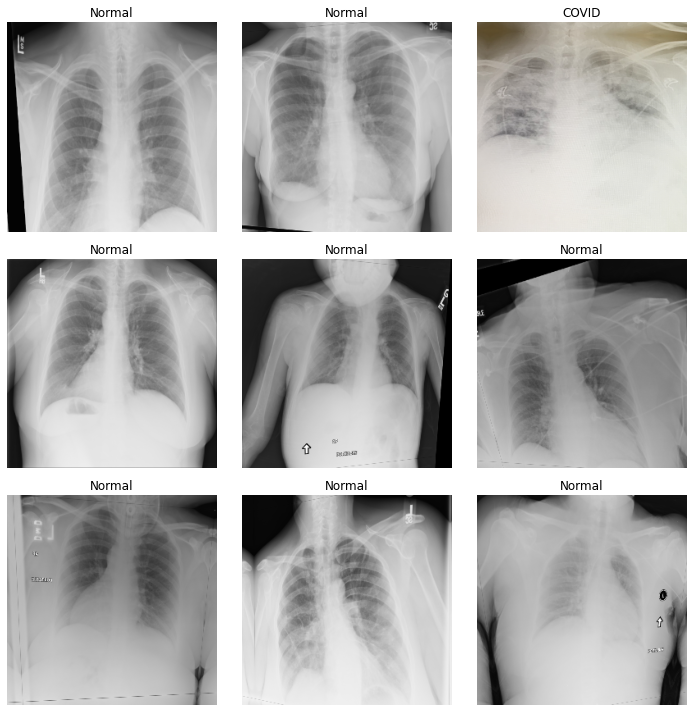

In [35]:
#Sample images from the dataset
data.show_batch(rows=3, figsize=(10,10))

In [36]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

## DarkCovidNet (modified Darknet model)

In [37]:
def conv_block(ni, nf, size=3, stride=1):
    for_pad = lambda s: s if s > 2 else 3
    return nn.Sequential(
        nn.Conv2d(ni, nf, kernel_size=size, stride=stride,
                  padding=(for_pad(size) - 1)//2, bias=False), 
        nn.BatchNorm2d(nf),
        nn.LeakyReLU(negative_slope=0.1, inplace=True)  
    )

In [38]:
def triple_conv(ni, nf):
    return nn.Sequential(
        conv_block(ni, nf),
        conv_block(nf, ni, size=1),  
        conv_block(ni, nf)
    )

In [39]:
def maxpooling():
    return nn.MaxPool2d(2, stride=2)

In [40]:
model = nn.Sequential(
    conv_block(3, 8),
    maxpooling(),
    conv_block(8, 16),
    maxpooling(),
    triple_conv(16, 32),
    maxpooling(),
    triple_conv(32, 64),
    maxpooling(),
    triple_conv(64, 128),
    maxpooling(),
    triple_conv(128, 256),
    conv_block(256, 128, size=1),
    conv_block(128, 256),
    conv_layer(256, 2),
    Flatten(),
    nn.Linear(338, 2)
)

In [41]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [42]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 256, 256]        216        True      
______________________________________________________________________
BatchNorm2d          [8, 256, 256]        16         True      
______________________________________________________________________
LeakyReLU            [8, 256, 256]        0          False     
______________________________________________________________________
MaxPool2d            [8, 128, 128]        0          False     
______________________________________________________________________
Conv2d               [16, 128, 128]       1,152      True      
______________________________________________________________________
BatchNorm2d          [16, 128, 128]       32         True      
______________________________________________________________________
LeakyReLU            [16, 128, 128]       0          False     
___________________________________________________

In [45]:
learn.fit_one_cycle(54, max_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.034285,0.080352,0.968000,00:41
1,0.038118,0.079410,0.976000,00:41
2,0.034522,0.069524,0.968000,00:41
3,0.041168,0.083867,0.968000,00:45
4,0.047960,0.084681,0.976000,00:44
5,0.052440,0.122361,0.960000,00:41
6,0.055962,0.282085,0.912000,00:41
7,0.071930,0.168376,0.944000,00:41
8,0.097486,0.175975,0.920000,00:41
9,0.106309,0.159374,0.952000,00:41


In [46]:
print("Number of examples in testing:", len(data.valid_ds))

Number of examples in testing: 125


In [47]:
probs,targets = learn.get_preds(ds_type=DatasetType.Valid) 

In [48]:
accuracy(probs,targets)

tensor(0.9840)

In [49]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['COVID', 'Normal'], 2, 500, 125)

In [50]:
probs = np.argmax(probs, axis=1)
correct = 0
for idx, pred in enumerate(probs):
    if pred == targets[idx]:
        correct += 1
accuracy = correct / len(probs)
print(len(probs), correct, accuracy)

from sklearn.metrics import confusion_matrix
np.set_printoptions(threshold=np.inf) 
cm1 = confusion_matrix(targets, probs)
print(cm1)

from sklearn.metrics import classification_report
y_true1 = targets
y_pred1 = probs
target_names = ['Covid-19', 'No_findings']
print(classification_report(y_true1, y_pred1, target_names=target_names))

125 123 0.984
[[ 18   1]
 [  1 105]]
              precision    recall  f1-score   support

    Covid-19       0.95      0.95      0.95        19
 No_findings       0.99      0.99      0.99       106

    accuracy                           0.98       125
   macro avg       0.97      0.97      0.97       125
weighted avg       0.98      0.98      0.98       125



In [51]:
interp = ClassificationInterpretation.from_learner(learn)

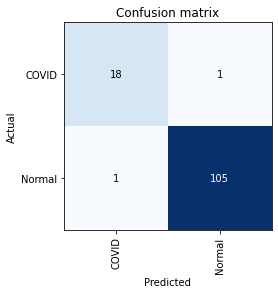

In [52]:
cm_fig = interp.plot_confusion_matrix(return_fig=True)
ax = cm_fig.gca()
ax.set_ylim(interp.data.c - .5, - .5);